# Introduction

Textual data is so rich in semantics and grammatical rules. Vectorizing texts while encoding all this information and knowledge is not straightforward. Up until now, embeddings have been the most convenient way to vectorize texts. <br>
Text embeddings are a dictionary with the keys being the words and the values being the vectors representing these words. In other words, to vectorize a phrase with three words, we fetch each word's vector from the embedding dictionary and either sum/average/concatenate/etc., these vectors.  

## Objective
This notebook aims to guide you through training your embeddings. <br>
While pre-trained embeddings are more available nowadays, they do not always fit the problem we have at hand. <br>
Medical textual data differs from Twitter conversations, google reviews, etc.,. Thus, we need to train our own embeddings to learn the contextual semantics of our dataset.

## Tasks
This notebook contains code you simply need to run and code cells you need to fill in. <br>
No code from your side is required in code blocks where you see the mention *run only*. <br>
When you see the mention *code*, a chunk of code is required from your side. <br>
When you see the mention *comment*, you will need to write a comment/an explication/ an analysis about the subject at hand. 

# 1. Load Wikipedia Corpus (*run only*)

In [1]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.corpora import WikiCorpus
path_to_wiki_dump = datapath("enwiki-latest-pages-articles1.xml-p000000010p000030302-shortened.bz2")
corpus_path = get_tmpfile("wiki-corpus.mm")
wiki = WikiCorpus(path_to_wiki_dump)
sentences = list(wiki.get_texts())

C:\Users\Natha\anaconda3\lib\site-packages\gensim\utils.py:1332: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected %s; aliasing chunkize to chunkize_serial" % entity)


In [8]:
print(type(sentences), len(sentences))

<class 'list'> 106


In [13]:
sentences #List of list

[['anarchism',
  'is',
  'political',
  'philosophy',
  'that',
  'advocates',
  'self',
  'governed',
  'societies',
  'based',
  'on',
  'voluntary',
  'institutions',
  'these',
  'are',
  'often',
  'described',
  'as',
  'stateless',
  'societies',
  'although',
  'several',
  'authors',
  'have',
  'defined',
  'them',
  'more',
  'specifically',
  'as',
  'institutions',
  'based',
  'on',
  'non',
  'hierarchical',
  'free',
  'associations',
  'anarchism',
  'considers',
  'the',
  'state',
  'to',
  'be',
  'undesirable',
  'unnecessary',
  'and',
  'harmful',
  'while',
  'anti',
  'statism',
  'is',
  'central',
  'anarchism',
  'entails',
  'opposing',
  'authority',
  'or',
  'hierarchical',
  'organisation',
  'in',
  'the',
  'conduct',
  'of',
  'all',
  'human',
  'relations',
  'including',
  'but',
  'not',
  'limited',
  'to',
  'the',
  'state',
  'system',
  'anarchism',
  'draws',
  'on',
  'many',
  'currents',
  'of',
  'thought',
  'and',
  'strategy',
  'ana

In [14]:
sentences[1] #List of key words

['autism',
 'is',
 'disorder',
 'characterized',
 'by',
 'impaired',
 'social',
 'interaction',
 'verbal',
 'and',
 'non',
 'verbal',
 'communication',
 'and',
 'restricted',
 'and',
 'repetitive',
 'behavior',
 'parents',
 'usually',
 'notice',
 'signs',
 'in',
 'the',
 'first',
 'two',
 'years',
 'of',
 'their',
 'child',
 'life',
 'these',
 'signs',
 'often',
 'develop',
 'gradually',
 'though',
 'some',
 'children',
 'with',
 'autism',
 'reach',
 'their',
 'developmental',
 'milestones',
 'at',
 'normal',
 'pace',
 'and',
 'then',
 'regress',
 'the',
 'diagnostic',
 'criteria',
 'require',
 'that',
 'symptoms',
 'become',
 'apparent',
 'in',
 'early',
 'childhood',
 'typically',
 'before',
 'age',
 'three',
 'while',
 'autism',
 'is',
 'highly',
 'heritable',
 'researchers',
 'suspect',
 'both',
 'environmental',
 'and',
 'genetic',
 'factors',
 'as',
 'causes',
 'in',
 'rare',
 'cases',
 'autism',
 'is',
 'strongly',
 'associated',
 'with',
 'agents',
 'that',
 'cause',
 'birth',


# 2. Word2vec skipgram - dimension of the word vectors = 50
## 2.1 Train word2vec with skipgram(*code*)

In [ ]:
from gensim.models import Word2Vec

In [41]:
# Set the parameters for the Word2Vec model
vector_size = 50
window_size = 5
min_count = 5
epochs = 10

# Initialize and train the Word2Vec model with skip-gram
model = Word2Vec(sentences, vector_size=vector_size, window=window_size, min_count=min_count, sg=1, epochs=epochs)
#sg = 1 mean using SkipGram

## 2.2 Print the first 20 words in the vocabulary (*code*)

In [19]:
# Get the list of words in the vocabulary
vocab = list(model.wv.index_to_key)

In [20]:
# Print the first 20 words in the vocabulary
print(vocab[:20])

['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that', 'with', 'was', 'on', 'are', 'from', 'an', 'or', 'it', 'at', 'be']


## 2.3 Print the embeddings vector for the words "education" and "algorithm" (*code*)

To print the embeddings vector for the words "education" and "algorithm", we can use the wv attribute of the Word2Vec model to access the word vectors. Specifically, you can use the wv.get_vector() method to get the vector for a given word.*

In [21]:
# Print the embeddings vector for "education"
print("Embedding vector for 'education':")
print(model.wv.get_vector("education"))

Embedding vector for 'education':
[-0.88989526 -0.3244733   0.19489874  0.15457411 -0.48361915 -1.1892312
  0.8722282   1.266182    0.18220852 -0.28210762 -0.29031304  0.09790483
 -0.21109132 -0.53633326  0.06836686  0.41257003  0.5457245   0.59017986
 -0.260593    0.01271041  0.81962883 -0.35167772  0.24820141 -0.19794355
 -0.48131382  0.03970333 -0.39134312  0.19869754 -0.63155615 -0.5489831
 -0.26904646  0.4261446   0.41064182  0.29943514 -0.02455929  0.30079082
  0.28376654 -0.12594126  0.15460093  0.0290887   0.22687261  0.159958
 -0.01038693  0.2895813  -0.41147068 -0.24819133 -0.1307512  -0.495358
 -0.47600368 -0.02410974]


In [22]:
# Print the embeddings vector for "algorithm"
print("Embedding vector for 'algorithm':")
print(model.wv.get_vector("algorithm"))

Embedding vector for 'algorithm':
[ 0.1964353   0.47095543  0.16331178 -0.7873885  -1.1005038  -0.7611507
 -0.28137854  0.06782603  0.06388337 -0.1958845  -0.05699315  0.656256
  1.3236533  -0.04183703 -0.37504265  0.0544801   0.63073456  0.12903821
 -0.03567366  0.07623347  0.02003624  0.5113112  -0.38623872 -0.3292654
  0.07875159 -0.49985522 -0.3417894   0.04844058  0.53148144 -0.18533003
  0.26302952  0.05030271  0.64915144  0.59076726 -0.398902   -0.24754806
 -0.48454833 -0.23507401 -1.2507893   0.43243244  0.70100814  0.02784733
  0.27123672  0.31175438  0.8180565  -0.03611023 -0.6283797  -0.5942106
 -0.05764894 -0.39317766]


## 2.4 Print the similarity between the words (*code*):
- "education" and "algorithm"
- "education" and "latin"
- "education" and "age"
- "education" and "death"
- "spanish" and "latin"

To print the similarity between the words "education" and "algorithm", we can use the similarity() method to compute the cosine similarity between the vectors. The cosine similarity is a measure of the similarity between two vectors that ranges from -1 (completely dissimilar) to 1 (identical).

In [24]:
# Get the similarity between "education" and "algorithm"
similarity = model.wv.similarity("education", "algorithm")

# Print the similarity
print(f"Similarity between 'education' and 'algorithm': {similarity:.4f}") #format the output as a floating-point number with 4 decimal places.

Similarity between 'education' and 'algorithm': 0.1100


The similarity is pretty low

In [36]:
def get_sim(word1,word2):
    sim = model.wv.similarity(word1, word2)
    print(f"Similarity between '{word1}' and '{word2}': {sim:.4f}")


In [37]:
get_sim("education","latin")
get_sim("education","age")
get_sim("education","death")
get_sim("spanish","latin")

Similarity between 'education' and 'latin': 0.1455
Similarity between 'education' and 'age': 0.4561
Similarity between 'education' and 'death': 0.2597
Similarity between 'spanish' and 'latin': 0.5497


## 2.5 Save the embeddings (*code*)

In [39]:
model.wv.save("embeddings.bin")
#This will save the embeddings to a binary file named "embeddings.bin".

To load the saved embeddings back into memory, you can use the load() method of the KeyedVectors object:

In [55]:
from gensim.models import KeyedVectors
#load_model = KeyedVectors.load("embeddings.bin")

# 3. Word2vec cbow - dimension of the word vectors = 50
## 3.1 Train word2vec with cbow(*code*)

In [42]:
# Set the parameters for the Word2Vec model
vector_size = 50
window_size = 5
min_count = 5
epochs = 10

# Initialize and train the Word2Vec model with skip-gram
cbw_model = Word2Vec(sentences, vector_size=vector_size, window=window_size, min_count=min_count, sg=0, epochs=epochs)
#sg = 0 mean using cbow

## 3.2 Print the first 20 words in the vocabulary (*code*)

In [43]:
# Get the list of words in the vocabulary
cbw_vocab = list(cbw_model.wv.index_to_key)

# Print the first 20 words in the vocabulary
print(cbw_vocab[:20])

['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that', 'with', 'was', 'on', 'are', 'from', 'an', 'or', 'it', 'at', 'be']


['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that', 'with', 'was', 'on', 'are', 'from', 'an', 'or', 'it', 'at', 'be'] Same values as SkipGram

## 3.3 Print the embeddings vector for the words "education" and "algorithm" (*code*)

In [44]:
# Print the embeddings vector for "education"
print("Embedding vector for 'education':")
print(cbw_model.wv.get_vector("education"))

Embedding vector for 'education':
[-1.3365659  -1.0359632  -0.06056917 -0.71932083 -0.8571559  -0.6172962
  1.375289    1.0653679  -0.19825903 -0.14932908 -0.997177   -0.55404776
 -0.21606277 -0.48827627  0.06639585  0.7709109   0.37366423  0.5310382
 -0.40735337 -0.41109243  0.31362695 -0.32257378  0.64176285  0.03941657
  0.10639643  0.5814632  -0.8751814   0.23530112 -0.69631904 -1.0422362
 -0.10772922  1.5253222   0.1704194   0.33478427 -0.08616091  0.7700148
  0.53686947  0.03375638 -0.22075881  0.38785923  0.8440723  -0.33558565
 -0.32375085  0.75248307 -0.6285529  -0.38475937 -0.51820254 -0.73729265
  0.02443208  0.04096539]


In [53]:
# Print the embeddings vector for "algorithm"
print("Embedding vector for 'algorithm':")
print(cbw_model.wv.get_vector("algorithm"))

Embedding vector for 'algorithm':
[-0.40682456  1.8932352   0.07591826 -0.95769763 -1.0049239  -1.6337465
 -0.73322594  0.03476483 -0.4473627  -0.09561165 -0.781175    0.12650314
  2.2551255  -1.1171783  -0.2668986   0.34949642  1.0154057   0.6945176
 -2.346362   -0.48005265 -0.96260077  0.81069136  0.6258919  -0.3813106
 -1.1430471  -0.4405092  -0.0725271  -1.3273962   0.9501781  -0.42436883
 -0.34983048 -0.89873904 -0.45431185  1.3819512  -0.92499924 -0.5569407
 -0.80969924 -0.17358145 -0.67951673  0.84994316  1.7324936   0.8117427
  1.5805869   1.6890166   1.3815287   0.8156951  -0.5065204  -0.40732083
 -0.26075774 -0.76933974]


## 3.4 Print the similarity between the words (*code*):
- "education" and "algorithm"
- "education" and "latin"
- "education" and "age"
- "education" and "death"
- "spanish" and "latin"

In [46]:
def get_sim_2(word1,word2,models):
    sim = models.wv.similarity(word1, word2)
    print(f"Similarity between '{word1}' and '{word2}': {sim:.4f}")

In [49]:
get_sim_2("education","algorithm",cbw_model)
get_sim_2("education","latin",cbw_model)
get_sim_2("education","age",cbw_model)
get_sim_2("education","death",cbw_model)
get_sim_2("spanish","latin",cbw_model)

Similarity between 'education' and 'algorithm': 0.0699
Similarity between 'education' and 'latin': -0.0445
Similarity between 'education' and 'age': 0.2782
Similarity between 'education' and 'death': 0.0720
Similarity between 'spanish' and 'latin': 0.4933


Similarity between 'education' and 'algorithm': 0.1100
Similarity between 'education' and 'latin': 0.1455
Similarity between 'education' and 'age': 0.4561
Similarity between 'education' and 'death': 0.2597
Similarity between 'spanish' and 'latin': 0.5497

We can first see that the similarity scores are quite differents

then we can observe negative scores. Negative scores in similarity indicate that the two words have opposite meanings or are not related at all. In your example, a negative score for the similarity between "education" and "latin" indicates that these two words are not closely related in the context of your training data. The score of -0.0445 suggests that they may even have opposite meanings or associations in your training data.


Skip-gram and Continuous Bag of Words (CBOW) are two different architectures used in training Word2Vec models.

Skip-gram predicts the context words (words surrounding the target word) given a target word, whereas CBOW predicts the target word given its context words. In other words, Skip-gram tries to predict the context words of a given word, while CBOW tries to predict a target word based on its context.

Looking at the similarity scores, it seems that CBOW is performing better for the word pair "education" and "age", while SkipGram is performing better for "education" and "latin" and "spanish" and "latin". It is difficult to draw conclusions without context and more data, but this highlights the importance of experimenting with different models to find the one that works best for a specific task.

### Notes for me 

In Skip-gram, the model takes a target word as input and tries to predict the probability of observing each of the surrounding words in the same sentence as the target word. The surrounding words are referred to as the context words. The context words could be a fixed number of words to the left and right of the target word, or a dynamically generated window around the target word based on a defined maximum distance.

For example, if we consider the sentence "The quick brown fox jumps over the lazy dog," and choose "fox" as the target word, then the context words could be "quick," "brown," "jumps," and "over."

On the other hand, in CBOW, the model takes the context words as input and tries to predict the target word. The context words are the words that surround the target word in a sentence. CBOW is based on the assumption that the probability of a word occurring in a given context depends only on the context words and not on the order in which they appear.

For example, if we consider the same sentence "The quick brown fox jumps over the lazy dog," and choose the context words as "quick," "brown," "jumps," and "over," then the target word could be "fox."

In summary, the difference between the two approaches is in the direction of the prediction. Skip-gram predicts the context words given a target word, while CBOW predicts the target word given its context words.

## 3.5 Save the embeddings (*code*)

In [50]:
cbw_model.wv.save("cbw_embeddings.bin")
#This will save the embeddings to a binary file named "embeddings.bin".

# 4. Visualizing Embeddings
## 4.1 SkipGram Model
### 4.1.1 Set the variable *model* to the skipgram word2vec model trained and saved in section 2 (*code*)

In [94]:
model = KeyedVectors.load("embeddings.bin") #Generate issues with the wv method

### 4.1.2 Clean the model's vocabulary from stopwords using the nltk library (*code*)
**NB:** if you did not know how to do this part, set the variable *words_vocab_without_sw* to *list(model.wv.index_to_key )*  i.e.  <br>

```
words_vocab_without_sw = list(model.wv.index_to_key )
```

In [95]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Natha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [96]:
# Get the vocabulary of the Word2Vec model
words_vocab = list(model.index_to_key) #Have to remove the .WV method because I've used the KeyedVectors.load method
print("Size of Vocabulary before Stop Words removal:", len(words_vocab))
print("Few words in Vocabulary:", words_vocab[:10])

# Remove the stopwords from the vocabulary
stop_words = set(stopwords.words('english'))  # Get the set of English stopwords from NLTK
words_vocab_without_sw = [word for word in words_vocab if word not in stop_words]

print("Size of Vocabulary after Stop Words removal:", len(words_vocab_without_sw))
print("Few words in Vocabulary:", words_vocab_without_sw[:10])

Size of Vocabulary before Stop Words removal: 9002
Few words in Vocabulary: ['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that']
Size of Vocabulary after Stop Words removal: 8881
Few words in Vocabulary: ['also', 'one', 'first', 'state', 'used', 'two', 'may', 'many', 'new', 'time']


We have here a small number of words because we set min_count = 5. The Model will only take words that appears at least 5 times.

In [97]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### 4.1.3 Visualizing the words that are semantically close to ['education', 'country', 'medicine', 'sports', 'movie'] using the Skipgram model (*run only*)

#### Hyperparameters of TSNE

1. n_components: the dimension of the value space.
2. perplexity: the number of neighbours.
3. n_iter: the maximum number of iterations for the optimization.
4. init: the embedding's initialization.

t-SNE requires good amount of hyperparameter tuning to give effective results.  <br>
References: <br>
- [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). 
- [Article](https://distill.pub/2016/misread-tsne/)

In [98]:
from sklearn.manifold import TSNE
import numpy as np, matplotlib.pyplot as plt, matplotlib.cm as cm
%matplotlib inline 
def cluster_words(model, cluster_key_words = ['education', 'country', 'medicine', 'sports', 'movie']):
    embedding_clusters = []
    word_clusters = []

    for word in cluster_key_words:
        embeddings_of_words_similar_to_key_word = []
        words_similar_to_key_word = []
        for similar_word, _ in model.most_similar(word, topn=30):
            words_similar_to_key_word.append(similar_word)
            embeddings_of_words_similar_to_key_word.append(model[similar_word])
        embedding_clusters.append(embeddings_of_words_similar_to_key_word)
        word_clusters.append(words_similar_to_key_word)

    print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word
    print("we have {} clusters".format(len(word_clusters)))
    print("Word in Cluster 1 of EDUCATION :",word_clusters[1])
    embedding_clusters = np.array(embedding_clusters)
    n, m, k = embedding_clusters.shape #geting the dimensions
    tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it
    return  embeddings_en_2d, word_clusters

def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

In [102]:
words_vocab_without_sw

['also',
 'one',
 'first',
 'state',
 'used',
 'two',
 'may',
 'many',
 'new',
 'time',
 'war',
 'states',
 'world',
 'apollo',
 'th',
 'would',
 'century',
 'american',
 'use',
 'art',
 'lincoln',
 'number',
 'people',
 'north',
 'united',
 'known',
 'however',
 'government',
 'form',
 'years',
 'national',
 'three',
 'british',
 'early',
 'often',
 'country',
 'including',
 'well',
 'since',
 'year',
 'called',
 'later',
 'made',
 'court',
 'south',
 'population',
 'general',
 'film',
 'alaska',
 'part',
 'angola',
 'found',
 'several',
 'example',
 'water',
 'became',
 'although',
 'group',
 'international',
 'alabama',
 'based',
 'language',
 'aristotle',
 'human',
 'einstein',
 'work',
 'system',
 'order',
 'university',
 'include',
 'city',
 'high',
 'could',
 'history',
 'modern',
 'greek',
 'large',
 'albania',
 'due',
 'life',
 'name',
 'according',
 'azerbaijan',
 'among',
 'acid',
 'four',
 'common',
 'second',
 'major',
 'union',
 'like',
 'different',
 'french',
 'much',
 

Needed to remove the .wv in the cell before because I'm using KeyedVectors to load the model.

Embedding clusters: [-0.2745344   0.04642442 -0.00394953  0.02693079 -0.48787642 -0.5228996
  0.23073871  0.6398344   0.24896209 -0.2200311  -0.392064   -0.00603777
  0.27690136 -0.11627542 -0.02064715  0.1351924   0.3280673   0.5666356
 -0.03559867 -0.10246752  0.3866124  -0.02074603  0.19224253  0.05084577
 -0.19768998  0.05281478 -0.23221044  0.24393089 -0.4673538  -0.40450028
  0.0047762  -0.01905885  0.09514054  0.08675515 -0.25286388 -0.07014969
  0.30720308 -0.09994272 -0.0500301   0.03936806  0.36752513  0.01459028
 -0.01745977  0.34237525 -0.13669616 -0.0247514  -0.0813711  -0.5792153
 -0.00686206  0.14101179]
we have 5 clusters
Word in Cluster 1 of EDUCATION : ['exporter', 'economies', 'continent', 'landlocked', 'shia', 'rest', 'urbanized', 'invested', 'strongest', 'tourist', 'alaskan', 'azerbaijanis', 'prosperity', 'hdi', 'fastest', 'margin', 'unorganized', 'proximity', 'metropolitan', 'housing', 'tornadoes', 'anp', 'migrants', 'densely', 'busiest', 'refuge', 'fertile', 'des

C:\Users\Natha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Natha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


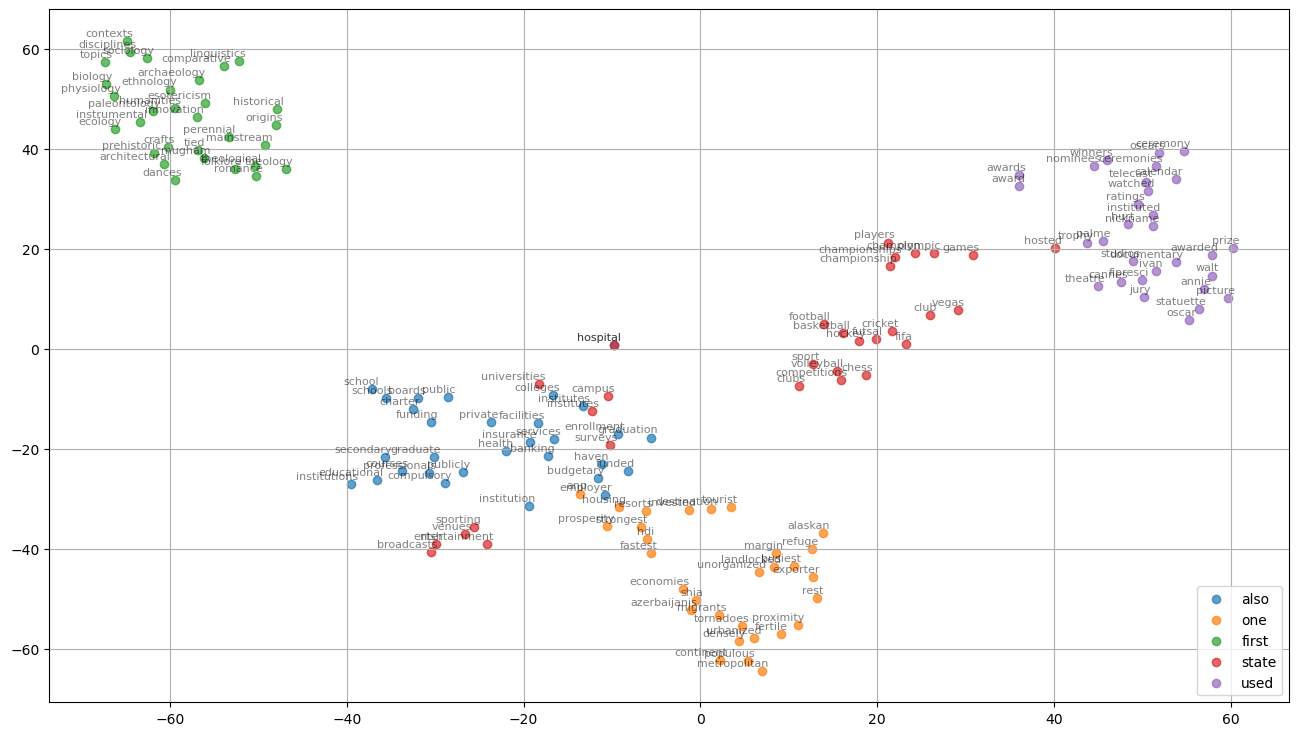

In [99]:
embeddings_en_2d, word_clusters = cluster_words(model, cluster_key_words = ['education', 'country', 'medicine', 'sports', 'movie'])
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

In [100]:
for i, cluster in enumerate(word_clusters[:5]):
    print(f"Cluster {i+1}: ")
    print('\n'.join(cluster))
    print('-' * 20)

Cluster 1: 
compulsory
public
charter
funding
colleges
school
enrollment
boards
private
schools
institution
graduation
graduate
institutions
facilities
courses
hospital
budgetary
employer
insurance
services
haven
secondary
professionals
educational
funded
publicly
health
institutes
banking
--------------------
Cluster 2: 
exporter
economies
continent
landlocked
shia
rest
urbanized
invested
strongest
tourist
alaskan
azerbaijanis
prosperity
hdi
fastest
margin
unorganized
proximity
metropolitan
housing
tornadoes
anp
migrants
densely
busiest
refuge
fertile
destination
populous
resorts
--------------------
Cluster 3: 
biology
disciplines
comparative
folklore
theological
physiology
archaeology
humanities
architectural
perennial
sociology
instrumental
ecology
theology
tied
mainstream
prehistoric
historical
topics
ethnology
esotericism
paleontology
linguistics
contexts
innovation
origins
romance
dances
mugham
crafts
--------------------
Cluster 4: 
volleyball
chess
football
hosted
sporting
com

Embedding clusters: [-0.2745344   0.04642442 -0.00394953  0.02693079 -0.48787642 -0.5228996
  0.23073871  0.6398344   0.24896209 -0.2200311  -0.392064   -0.00603777
  0.27690136 -0.11627542 -0.02064715  0.1351924   0.3280673   0.5666356
 -0.03559867 -0.10246752  0.3866124  -0.02074603  0.19224253  0.05084577
 -0.19768998  0.05281478 -0.23221044  0.24393089 -0.4673538  -0.40450028
  0.0047762  -0.01905885  0.09514054  0.08675515 -0.25286388 -0.07014969
  0.30720308 -0.09994272 -0.0500301   0.03936806  0.36752513  0.01459028
 -0.01745977  0.34237525 -0.13669616 -0.0247514  -0.0813711  -0.5792153
 -0.00686206  0.14101179]
we have 5 clusters
Word in Cluster 1 of EDUCATION : ['exporter', 'economies', 'continent', 'landlocked', 'shia', 'rest', 'urbanized', 'invested', 'strongest', 'tourist', 'alaskan', 'azerbaijanis', 'prosperity', 'hdi', 'fastest', 'margin', 'unorganized', 'proximity', 'metropolitan', 'housing', 'tornadoes', 'anp', 'migrants', 'densely', 'busiest', 'refuge', 'fertile', 'des

C:\Users\Natha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Natha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


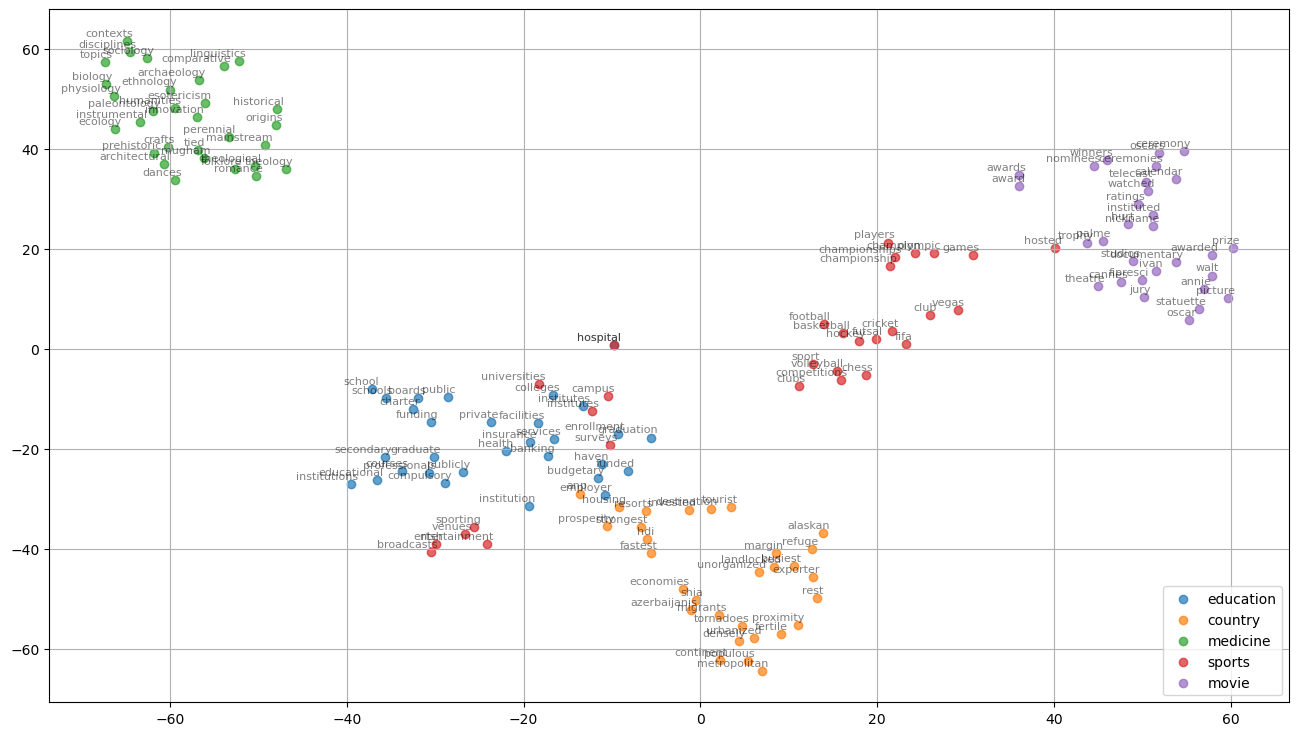

In [103]:
labels = ['education', 'country', 'medicine', 'sports', 'movie'] #Corrected labels
embeddings_en_2d, word_clusters = cluster_words(model, cluster_key_words = ['education', 'country', 'medicine', 'sports', 'movie'])
tsne_plot_similar_words(labels, embeddings_en_2d, word_clusters)

## 4.2 CbOW
### 4.2.1 Set the variable *model* to the cbow word2vec model trained and saved in section 3 (*code*)

In [104]:
model = KeyedVectors.load("cbw_embeddings.bin") #Generate issues with the wv method

### 4.2.2 Clean the model's vocabulary from stopwords using the nltk library (*code*)
**NB:** if you did not know how to do this part, set the variable *words_vocab_without_sw* to *list(model.wv.index_to_key )*  i.e.  <br>

```
words_vocab_without_sw = list(model.wv.index_to_key )
```

In [105]:
words_vocab = list(model.index_to_key )
print("Size of Vocabulary before Stop Words removal:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:10])


# Remove the stopwords from the vocabulary
stop_words = set(stopwords.words('english'))  # Get the set of English stopwords from NLTK
words_vocab_without_sw = [word for word in words_vocab if word not in stop_words]

print("Size of Vocabulary after Stop Words removal:",len(words_vocab_without_sw))
print("Few words in Vocabulary",words_vocab_without_sw[:10])

Size of Vocabulary before Stop Words removal: 9002
Few words in Vocabulary ['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that']
Size of Vocabulary after Stop Words removal: 8881
Few words in Vocabulary ['also', 'one', 'first', 'state', 'used', 'two', 'may', 'many', 'new', 'time']


We have here a small number of words because we set min_count = 5. The Model will only take words that appears at least 5 times.

### 4.2.3 Visualizing the words that are semantically close to ['education', 'country', 'medicine', 'sports', 'movie'] using the CBoW model (*run only*)

Embedding clusters: [-0.99316746 -0.7108797  -0.10496584 -0.335046   -0.63878924 -0.20330372
  1.2882056   1.1732242  -0.24532971 -0.02739072 -0.4553379  -0.25318846
 -0.18349873 -0.34654677 -0.4255402   0.5430416   0.30148593  0.22871028
 -0.31125113 -0.5057335   0.259961   -0.02775455  0.3897883   0.3520311
  0.3252056   0.600973   -0.9601257  -0.02618759 -0.6113596  -0.72292554
  0.03441784  1.1488647   0.12223619  0.41199687 -0.08367204  0.5914639
  0.6851466  -0.11235493  0.06245532  0.01306689  0.71182394 -0.24511176
 -0.24479014  0.6721667  -0.36602038 -0.2077035  -0.2566066  -1.0263418
 -0.01874943  0.3146088 ]
we have 5 clusters
Word in Cluster 1 of EDUCATION : ['province', 'economy', 'majority', 'highest', 'nation', 'population', 'largest', 'region', 'hdi', 'census', 'azerbaijan', 'albania', 'alaska', 'afghanistan', 'approximately', 'area', 'reserves', 'inhabitants', 'alberta', 'algeria', 'territory', 'iran', 'andorra', 'lowest', 'coastline', 'southeastern', 'settlement', 'an

C:\Users\Natha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Natha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


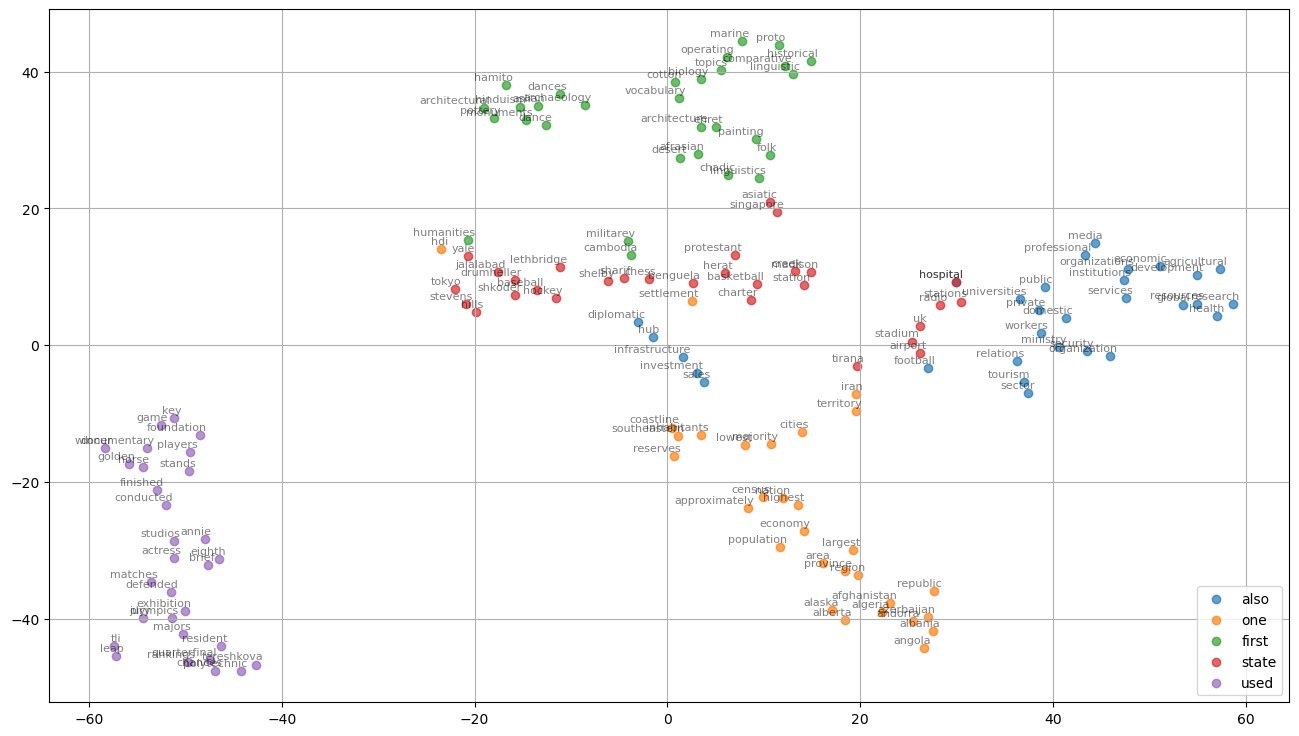

In [106]:
embeddings_en_2d, word_clusters = cluster_words(model, cluster_key_words = ['education', 'country', 'medicine', 'sports', 'movie'])
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

In [107]:
for i, cluster in enumerate(word_clusters[:5]):
    print(f"Cluster {i+1}: ")
    print('\n'.join(cluster))
    print('-' * 20)

Cluster 1: 
public
services
health
research
sector
economic
private
relations
domestic
organization
infrastructure
football
organizations
sales
investment
global
institutions
ministry
tourism
resources
hub
universities
professional
development
agricultural
hospital
media
diplomatic
workers
security
--------------------
Cluster 2: 
province
economy
majority
highest
nation
population
largest
region
hdi
census
azerbaijan
albania
alaska
afghanistan
approximately
area
reserves
inhabitants
alberta
algeria
territory
iran
andorra
lowest
coastline
southeastern
settlement
angola
cities
republic
--------------------
Cluster 3: 
comparative
hamito
architecture
folk
dances
proto
historical
vocabulary
cotton
aslian
architectural
linguistic
dance
linguistics
marine
desert
humanities
biology
archaeology
pottery
operating
cambodia
afrasian
monuments
topics
painting
ehret
militarev
hinduism
chadic
--------------------
Cluster 4: 
stations
basketball
tokyo
airport
radio
herat
shkodër
station
hockey
shari

Embedding clusters: [-0.99316746 -0.7108797  -0.10496584 -0.335046   -0.63878924 -0.20330372
  1.2882056   1.1732242  -0.24532971 -0.02739072 -0.4553379  -0.25318846
 -0.18349873 -0.34654677 -0.4255402   0.5430416   0.30148593  0.22871028
 -0.31125113 -0.5057335   0.259961   -0.02775455  0.3897883   0.3520311
  0.3252056   0.600973   -0.9601257  -0.02618759 -0.6113596  -0.72292554
  0.03441784  1.1488647   0.12223619  0.41199687 -0.08367204  0.5914639
  0.6851466  -0.11235493  0.06245532  0.01306689  0.71182394 -0.24511176
 -0.24479014  0.6721667  -0.36602038 -0.2077035  -0.2566066  -1.0263418
 -0.01874943  0.3146088 ]
we have 5 clusters
Word in Cluster 1 of EDUCATION : ['province', 'economy', 'majority', 'highest', 'nation', 'population', 'largest', 'region', 'hdi', 'census', 'azerbaijan', 'albania', 'alaska', 'afghanistan', 'approximately', 'area', 'reserves', 'inhabitants', 'alberta', 'algeria', 'territory', 'iran', 'andorra', 'lowest', 'coastline', 'southeastern', 'settlement', 'an

C:\Users\Natha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Natha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


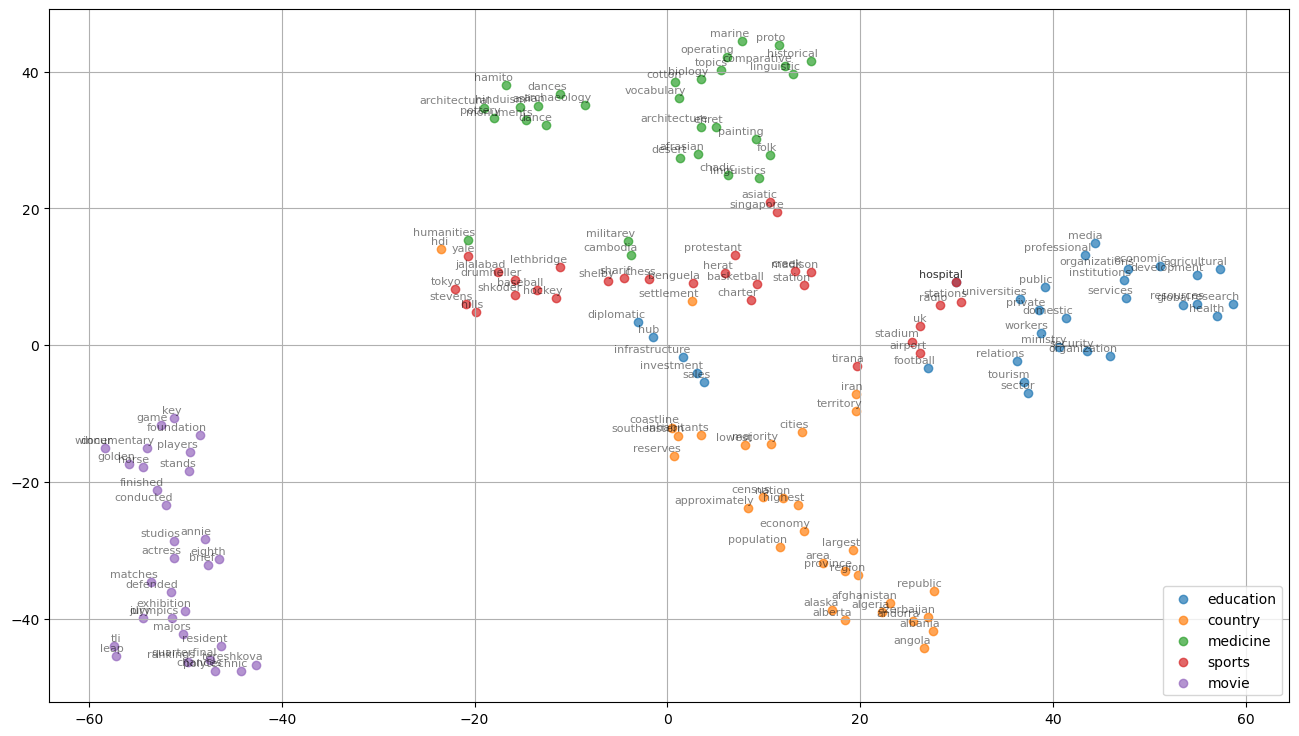

In [108]:
labels = ['education', 'country', 'medicine', 'sports', 'movie'] #Corrected labels
embeddings_en_2d, word_clusters = cluster_words(model, cluster_key_words = ['education', 'country', 'medicine', 'sports', 'movie'])
tsne_plot_similar_words(labels, embeddings_en_2d, word_clusters)

## 4.3 Compare the two figures in section 4.1.3 and 4.2.3 and comment (*comment*)

Upon comparing the two lists of clusters generated by SkipGram and Cbow, we can observe some similarities and differences. Both models have successfully clustered words related to Education, Country, Medicine, Sports, and Movie in their respective clusters. However, the specific words clustered in each group and the overall structure of the clusters differ between the two models.

In SkipGram, the Education cluster contains words related to schools, education systems, and funding, while the Country cluster contains words related to geography, population, and economy. In contrast, in Cbow, the Education cluster contains words related to infrastructure, tourism, and development, while the Country cluster contains words related to demographics, economy, and regions. This suggests that SkipGram may have focused more on the education system itself, while Cbow may have focused more on the impact of education on a country's infrastructure and development.

The Medicine cluster in SkipGram includes words related to healthcare and institutions, while the Medicine cluster in Cbow includes words related to linguistics, archaeology, and biology. The Sports cluster in SkipGram includes words related to sports broadcasting and surveys, while the Sports cluster in Cbow includes words related to sports venues and stations. The Movie cluster in SkipGram includes words related to film festivals and awards, while the Movie cluster in Cbow includes words related to exhibitions and rankings.

One possible explanation for these differences is the difference in how the two models approach word embeddings. SkipGram generates embeddings by predicting the context words given a target word, while Cbow generates embeddings by predicting the target word given a context window. This difference in approach may result in different cluster structures, with SkipGram focusing more on words that co-occur frequently in the same context, while Cbow may be more focused on words that share similar contexts.

Overall, it is important to note that the clustering of words in SkipGram and Cbow is a reflection of the semantic relationships between these words. The differences observed between the two models suggest that the choice of model and hyperparameters can have a significant impact on the resulting clusters. 